# NFDRSV4 Command Line Interface (CLI)

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Source: https://colorbrewer2.org/#type=diverging&scheme=Spectral&n=5
col1 = '#d7191c'
col2 = '#fdae61'
col3 = '#ffffbf'
col4 = '#abdda4'
col5 = '#2b83ba'

<h3>RunNFDRS takes 1 parameter: A path to a RunNFDRS configuration file.</h3>
Usage: <em>RunNFDRS configFileName</em><br>
     where configFileName is the complete path to a RunNFDRS configuration file<br>
     
The config file points to two other files: the fire weather file (FW21 in CSV format) and the initialization file which sets up the NFDRS model<br>

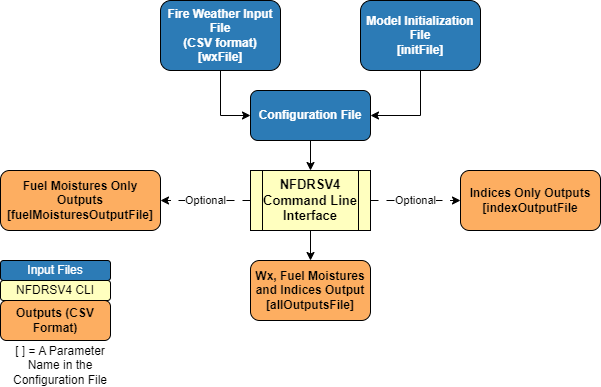

In [4]:
!RunNFDRS.exe Oristano.cfg

Total milliseconds time for NFDRS: 29879


In [5]:
siteName = "Oristano"
dat = pd.read_csv('Oristano_output.csv')
dat.rename(columns=lambda x: x.strip(), inplace=True)
dat['DateTime']=pd.to_datetime(dat['DateTime'].astype(str))
dat.set_index(dat.DateTime,inplace=True)

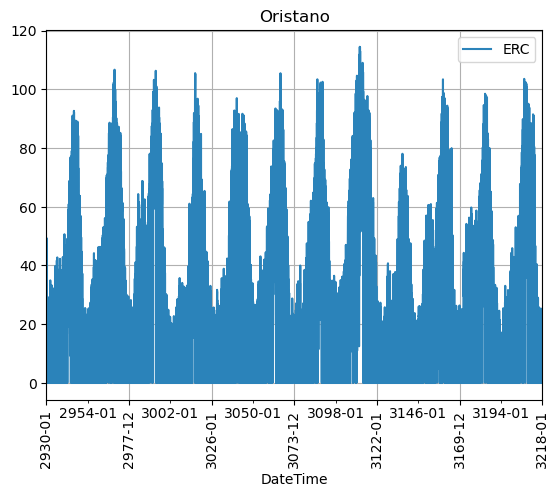

In [6]:
f,ax = plt.subplots()
dat.ERC.plot(ax=ax,title=siteName,color=col5,legend=True,label="ERC")
plt.grid()
# use formatters to specify major and minor ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
_ = plt.xticks(rotation=90)    

Text(0, 0.5, 'Energy Release Component')

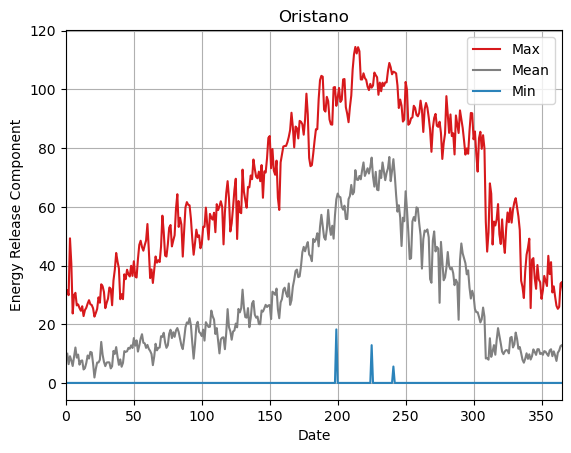

In [9]:
Variable = "ERC"
VariableLabel = "Energy Release Component"
# Plot the historical daily min, mean and max Energy Release Component
f,ax = plt.subplots()
dat[Variable].groupby(dat.DateTime.dt.dayofyear).max().plot(ax=ax,title=siteName,color=col1,legend=True,label="Max")
dat[Variable].groupby(dat.DateTime.dt.dayofyear).mean().plot(ax=ax,title=siteName,color='grey',legend=True,label='Mean')
dat[Variable].groupby(dat.DateTime.dt.dayofyear).min().plot(ax=ax,title=siteName,color=col5,legend=True,label="Min")
plt.grid()
ax.set_xlim(0,365)
ax.set_xlabel("Date")
ax.set_ylabel(VariableLabel)